<a href="https://colab.research.google.com/github/thanhyx4/H-M-Personalized-Fashion-Recommendations/blob/main/Data_understand_RecSys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df_article = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/H&M_RecSys/articles.csv")

df_tran = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/H&M_RecSys/transactions_train.csv")
df_cus =  pd.read_csv("/content/drive/MyDrive/Colab Notebooks/H&M_RecSys/customers.csv")
df_sub = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/H&M_RecSys/sample_submission.csv")

# P1: EDA

In [ ]:
print(f"Number of observations in ARTICLES:", df_article.shape)
print(f"Number of observations in CUSTOMERS:", df_cus.shape)
print(f"Number of observations in TRANSACTIONS:", df_tran.shape)

Number of observations in ARTICLES: (105542, 31)
Number of observations in CUSTOMERS: (1048575, 7)
Number of observations in TRANSACTIONS: (31788324, 5)


In [ ]:
 def data_overview(df):           #khao sat data, null_data
  df_null = pd.DataFrame(df.isnull().sum().reset_index())
  df_null.columns = ['feature', 'qtd_null']
  df_null['percent_null'] = df_null['qtd_null']/len(df)
  df_null['dtype'] = df_null['feature'].apply(lambda x: df[x].dtype)

  return df_null


## 1. Article Understand

When we want to recommend a product to a customer, we need to know more about the product and understand the customer to make a quality recommendation

In [ ]:
print(data_overview(df_article))

                         feature  qtd_null  percent_null   dtype
0                     Unnamed: 0         0      0.000000   int64
1                   Unnamed: 0.1         0      0.000000   int64
2                     article_id         0      0.000000   int64
3                   product_code         0      0.000000   int64
4                      prod_name         0      0.000000  object
5                product_type_no         0      0.000000   int64
6              product_type_name         0      0.000000  object
7             product_group_name         0      0.000000  object
8        graphical_appearance_no         0      0.000000   int64
9      graphical_appearance_name         0      0.000000  object
10             colour_group_code         0      0.000000   int64
11             colour_group_name         0      0.000000  object
12     perceived_colour_value_id         0      0.000000   int64
13   perceived_colour_value_name         0      0.000000  object
14    perceived_colour_ma

### 1.1. Product Type Name

In [ ]:
print(df_article['product_type_name'].value_counts().head())

Trousers    11169
Dress       10362
Sweater      9302
T-shirt      7904
Top          4155
Name: product_type_name, dtype: int64


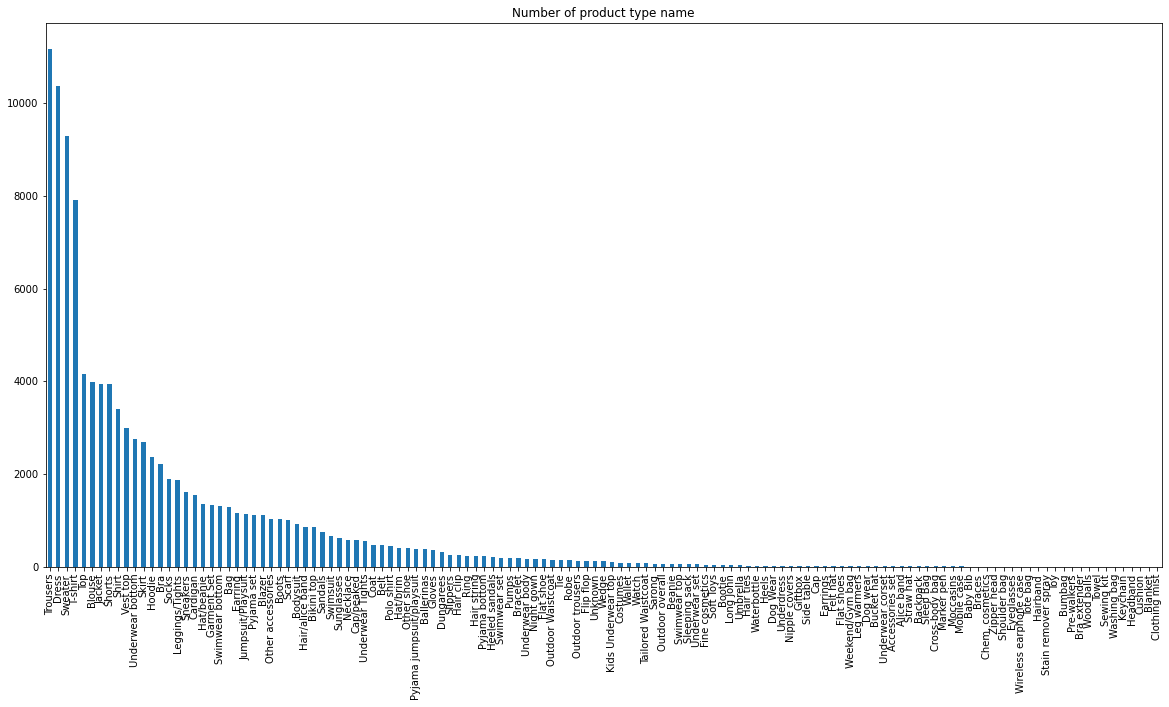

In [ ]:
df_article['product_type_name'].value_counts().plot( kind='bar', figsize = (20,10), title = 'Number of product type name')


### 1.2. Product Group Name

In [ ]:
print(df_article['product_group_name'].value_counts().head())

Garment Upper body    42741
Garment Lower body    19812
Garment Full body     13292
Accessories           11158
Underwear              5490
Name: product_group_name, dtype: int64


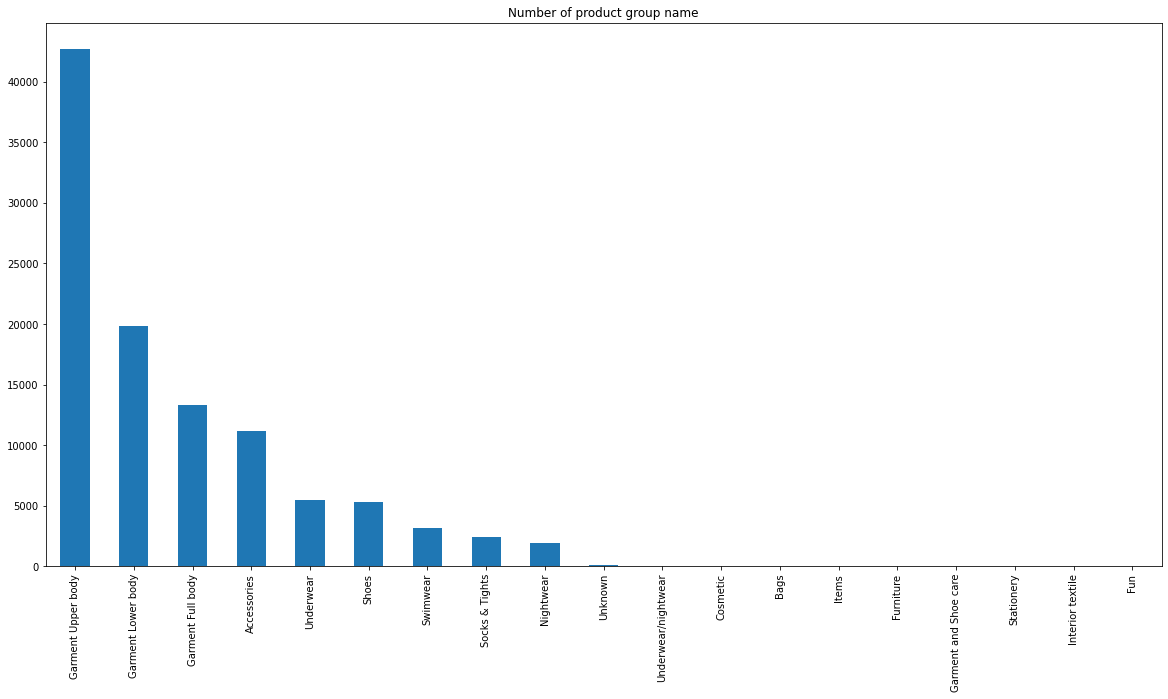

In [ ]:
df_article['product_group_name'].value_counts().plot( kind='bar', figsize = (20,10), title = 'Number of product group name')

### 1.3. Graphical Appearance Name

In [ ]:
print(df_article['graphical_appearance_name'].value_counts().head())

Solid               49747
All over pattern    17165
Melange              5938
Stripe               4990
Denim                4842
Name: graphical_appearance_name, dtype: int64


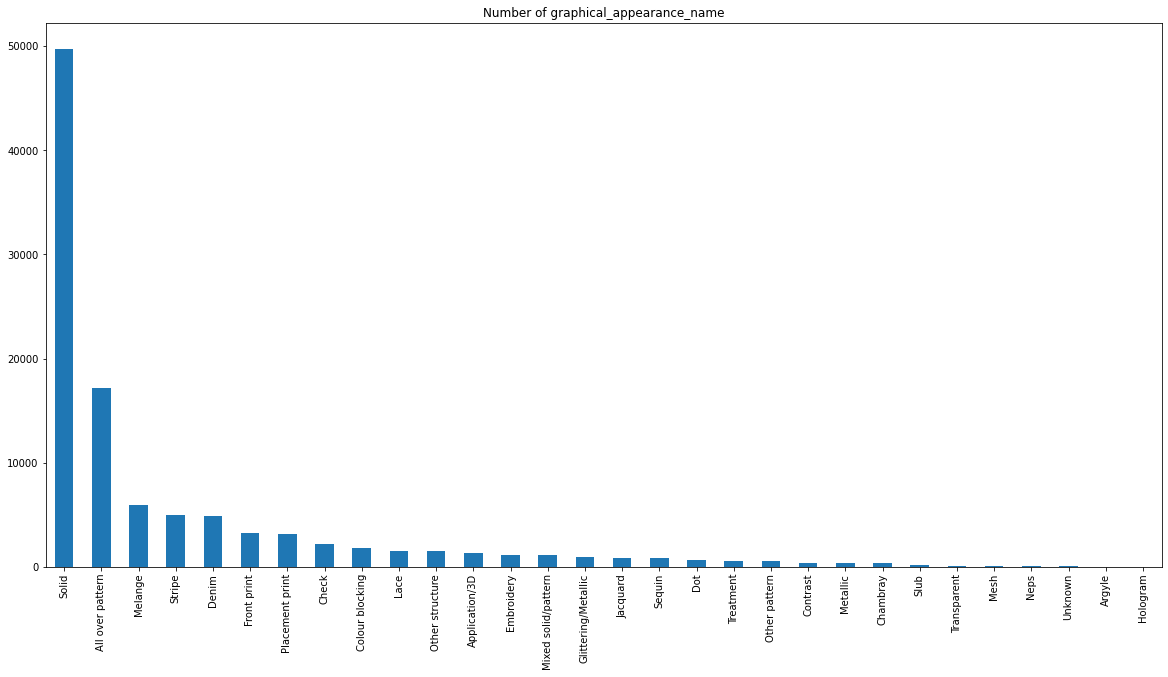

In [ ]:
df_article['graphical_appearance_name'].value_counts().plot( kind='bar', figsize = (20,10), title = 'Number of graphical_appearance_name')

### 1.4. Color Group Name

In [ ]:
print(df_article['colour_group_name'].value_counts().head())

Black         22670
Dark Blue     12171
White          9542
Light Pink     5811
Grey           4487
Name: colour_group_name, dtype: int64


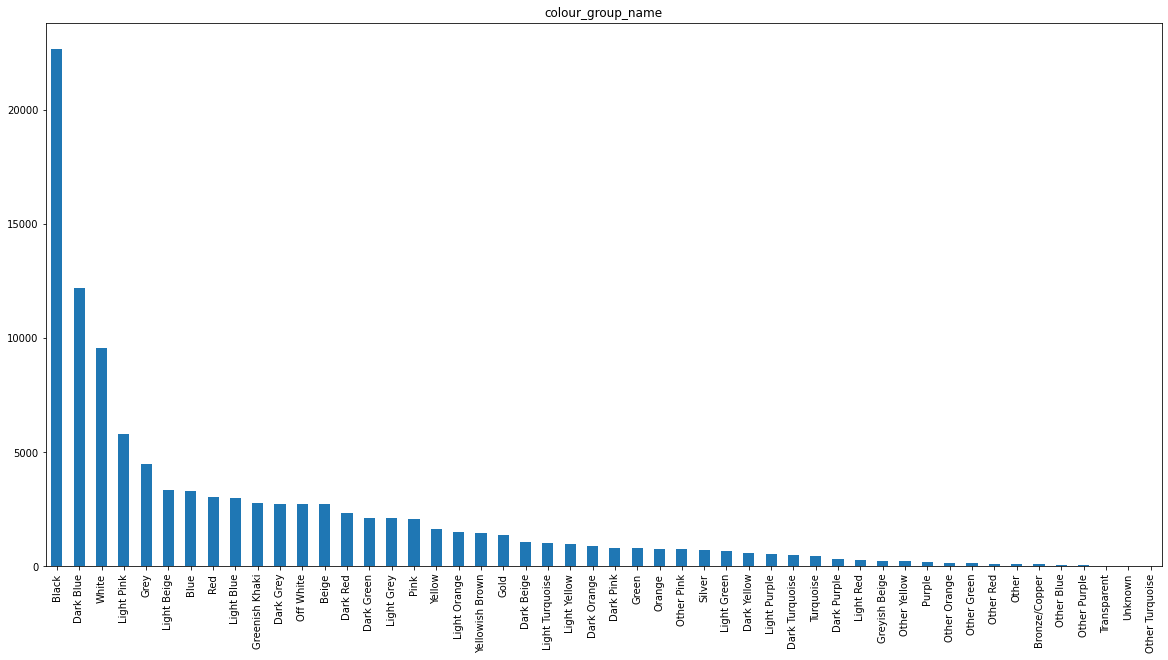

In [ ]:
df_article['colour_group_name'].value_counts().plot( kind='bar', figsize = (20,10), title = 'colour_group_name')

### 1.5. Index Group Name, Index Name, Department Name

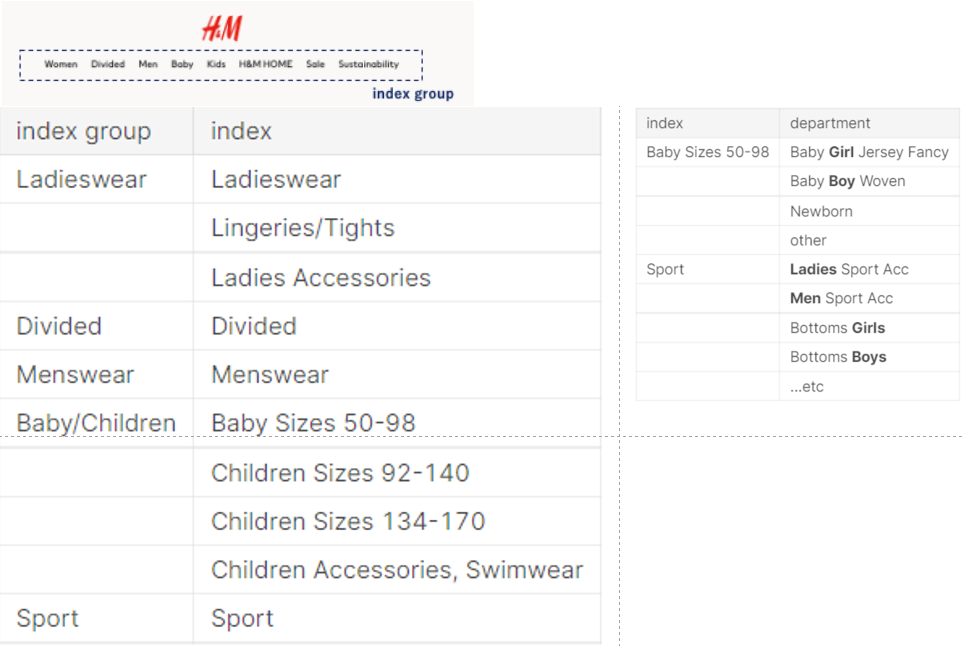

In [ ]:
#df_article.loc[df_article['index_name'] == 'Ladieswear', 'department_name'].unique()
department = pd.DataFrame(columns = [np.sort(df_article['index_name'].unique())])
for index_name in df_article['index_name'].unique():
  department[index_name] = pd.Series(df_article.loc[df_article['index_name'] == index_name , 'department_name'].unique())
department.head()

,Baby Sizes 50-98,"Children Accessories, Swimwear",Children Sizes 134-170,Children Sizes 92-140,Divided,Ladies Accessories,Ladieswear,Lingeries/Tights,Menswear,Sport
0,Baby basics,Kids Girl Big Acc,Young Girl Jersey Basic,Kids Boy Denim,UW,EQ & Special Collections,Jersey Basic,Clean Lingerie,Jersey Basic,Men Sport Woven
1,Baby Nightwear,Kids Girl Swimwear,Young Girl UW/NW,Kids Boy Jersey Basic,Divided Shoes,Hair Accessories,Jersey,Tights basic,Jacket Street,Men Sport Bottoms
2,Baby Socks,Young Girl Swimwear,Young Boy Jersey Basic,Kids Girl UW/NW,Basic 1,Other items,Knitwear,Casual Lingerie,Underwear Jersey,Men Sport Acc
3,Baby Toys/Acc,Kids Boy Swimwear,Young Girl S&T,Kids Girl S&T,Tops Knitwear DS,Belts,Woven bottoms,Shopbasket Socks,Shirt,Men Sport Tops
4,Baby Boy Outdoor,Young boy Swimwear,Young Boy Trouser,Kids Girl Jersey Basic,Small Accessories,Sunglasses,Trouser,Socks,Trouser,Ladies Sport Bras


In [ ]:
print(df_article['product_group_name'].unique())

['Garment Upper body' 'Underwear' 'Socks & Tights' 'Garment Lower body'
 'Accessories' 'Items' 'Nightwear' 'Unknown' 'Underwear/nightwear' 'Shoes'
 'Swimwear' 'Garment Full body' 'Cosmetic' 'Interior textile' 'Bags'
 'Furniture' 'Garment and Shoe care' 'Fun' 'Stationery']


In [ ]:
print(df_article['section_name'].unique())

['Womens Everyday Basics' 'Womens Lingerie'
 'Womens Nightwear, Socks & Tigh' 'Baby Essentials & Complements'
 'Men Underwear' 'Mama' 'Womens Small accessories' 'Men H&M Sport'
 'Kids Boy' 'Divided Basics' 'Girls Underwear & Basics' 'Mens Outerwear'
 'Womens Big accessories' 'Divided Accessories'
 'Womens Swimwear, beachwear' 'Divided Selected' 'Boys Underwear & Basics'
 'Contemporary Street' 'Contemporary Casual' 'Men Accessories'
 'Men Suits & Tailoring' 'Womens Everyday Collection' 'Men Shoes'
 'Young Boy' 'H&M+' 'Divided Collection' 'Ladies Denim'
 'Contemporary Smart' 'Womens Trend' 'Kids Outerwear' 'Young Girl'
 'Womens Shoes' 'Womens Tailoring' 'Divided Projects' 'Denim Men'
 'Men Other' 'Womens Jackets' 'Men Other 2' 'Baby Boy' 'Womens Casual'
 'Kids Accessories, Swimwear & D' 'Ladies H&M Sport' 'Kids & Baby Shoes'
 'Baby Girl' 'Kids Girl' 'Divided Complements Other' 'Womens Premium'
 'Special Collections' 'Kids Sports' 'Men Project' 'Men Edition'
 'Collaborations' 'Divided Asi

In [ ]:
print(df_article['garment_group_name'].unique())

['Jersey Basic' 'Under-, Nightwear' 'Socks and Tights' 'Jersey Fancy'
 'Accessories' 'Trousers Denim' 'Outdoor' 'Shoes' 'Swimwear' 'Knitwear'
 'Shirts' 'Trousers' 'Dressed' 'Shorts' 'Dresses Ladies' 'Skirts'
 'Special Offers' 'Blouses' 'Unknown' 'Woven/Jersey/Knitted mix Baby'
 'Dresses/Skirts girls']


Index group: "ladiesswear, menswears, baby boy, baby girl"

section name contain:"mama"

-> flag the articles, whether they are for men, womenm or 'mama' (divided: ladies)

NOTE: exist article_id: female & mama

In [ ]:
# def set_gender_flg(x):
#     x['is_for_male'] = 0
#     x['is_for_female'] = 0
#     x['is_for_mama'] = 0
#     if x['index_group_name'] in ['Ladieswear','Divided']:
#         x['is_for_female'] = 1
#     if x['index_group_name'] == 'Menswear':
#         x['is_for_male'] = 1
#     if x['index_group_name'] in ['Baby/Children','Sport']:
#         if 'boy' in x['department_name'].lower() or 'men' in x['department_name'].lower():
#             x['is_for_male'] = 1
#         if 'girl' in x['department_name'].lower() or 'ladies' in x['department_name'].lower():
#             x['is_for_female'] = 1
#     if x['section_name'] == 'Mama':
#         x['is_for_mama'] = 1
#     return x

# df_article = df_article.apply(set_gender_flg, axis=1)
# df_article['idxgrp_idx_prdtyp'] = df_article['index_group_name'] + '_' + df_article['index_name'] + '_' + df_article['product_type_name'] +'_' + df_article['prod_name']
# df_article.to_csv("/content/drive/MyDrive/Colab Notebooks/H&M_RecSys/articles.csv")

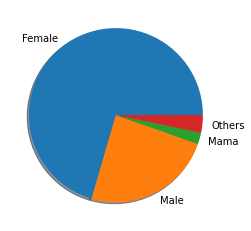

<Figure size 1280x1280 with 0 Axes>

In [22]:
from matplotlib.pyplot import figure

plt.pie(np.array([df_article['is_for_female'].sum(), df_article['is_for_male'].sum(), df_article['is_for_mama'].sum(), 105542 - 74402 -25431 -2266  ]),labels = ['Female', 'Male', 'Mama', 'Others'], shadow = True)
figure(figsize=(16,16), dpi=80)
plt.show() 

## 2. Customer Understand

In [ ]:
print(data_overview(df_cus))                #

                  feature  qtd_null  percent_null    dtype
0             customer_id         0      0.000000   object
1                      FN    683679      0.652008  float64
2                  Active    693339      0.661220  float64
3      club_member_status      4604      0.004391   object
4  fashion_news_frequency     12304      0.011734   object
5                     age     12120      0.011559  float64
6             postal_code         0      0.000000   object


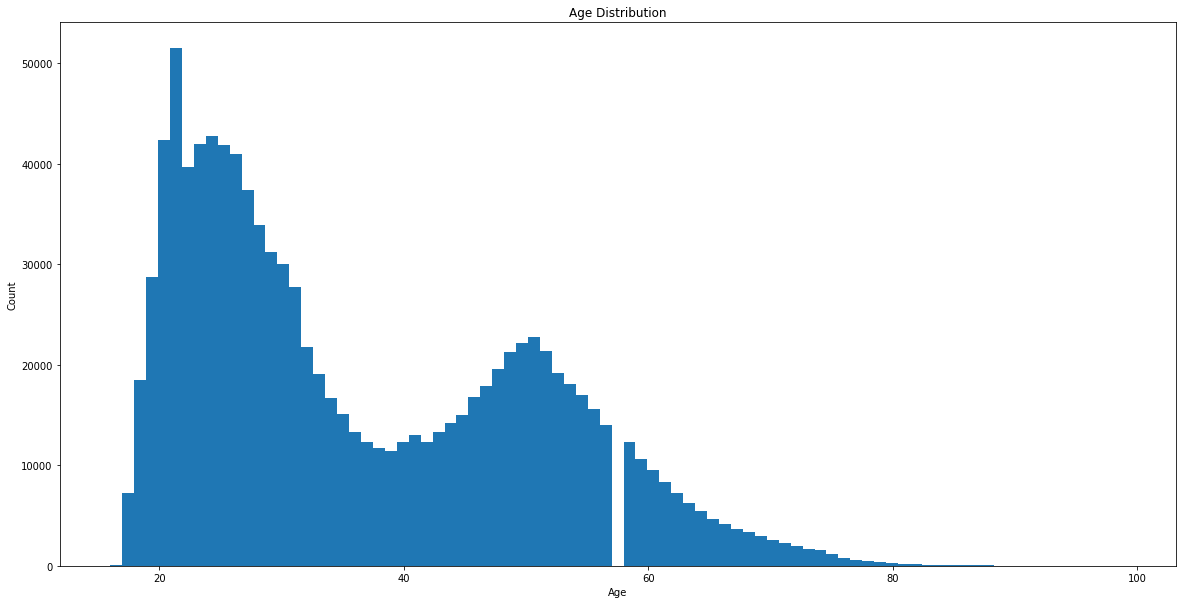

In [ ]:
df_cus['age'].plot( kind='hist', figsize = (20,10), title = 'Age Distribution', bins=len(df_cus['age'].unique()))
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [ ]:
df_cus['FN'].value_counts()

1.0    364896
Name: FN, dtype: int64

In [ ]:
df_cus['club_member_status'].value_counts()

ACTIVE        972599
PRE-CREATE     71024
LEFT CLUB        348
Name: club_member_status, dtype: int64

In [ ]:
df_cus['postal_code'].value_counts()

2c29ae653a9282cce4151bd87643c907644e09541abc28ae87dea0d1f6603b1c    92024
cc4ed85e30f4977dae47662ddc468cd2eec11472de6fac5ec985080fd92243c8      197
7c1fa3b0ec1d37ce2c3f34f63bd792f3b4494f324b6be5d1e4ba6a75456b96a7      124
714976379549eb90aae4a71bca6c7402cc646ae7c40f6c1cb91d4b5a18623fc1      121
1f5bd429acc88fbbf24de844a59e438704aa8761bc7b99fd977cad297c50b74c      119
                                                                    ...  
e42cdfff5882b6b9d0b654240f1223f2757c033d20d64cd1f8fbe58a934fbfe7        1
86e2fa0e7f38fbdd03363fc45b6e41359f4b5c6f61c09efe49092595664925e4        1
a840860b290a6b08fdc3c43ce76758e9e82933fc377bfdc225c3073176b965e4        1
51c7c46e30a2e17c99f7305ee58b603c5c23f7d887e995937a5a5c16d4c35ee9        1
6d9cc04755e0758b73ff0ec417a64ebdd73fb698b75e7e1c9dece219128f2b01        1
Name: postal_code, Length: 326710, dtype: int64

## 3. Transaction Understand

data transactions: 20/9/2019 - 22/9/2020

In [ ]:
df_tran['t_dat'] = pd.to_datetime(df_tran['t_dat'])
print(data_overview(df_tran))

            feature  qtd_null  percent_null           dtype
0             t_dat         0           0.0  datetime64[ns]
1       customer_id         0           0.0          object
2        article_id         0           0.0           int64
3             price         0           0.0         float64
4  sales_channel_id         0           0.0           int64


In [ ]:
df_tran['sales_channel_id'].value_counts()      #on/off

2    22379862
1     9408462
Name: sales_channel_id, dtype: int64

In [ ]:
#df_tran['year_month'] =  df_tran['t_dat'].dt.year.astype(str) + '-' + df_tran['t_dat'].dt.month.astype(str)+ '-1'
df_grp_prod_type = df_tran[['article_id', 'price', 't_dat']]
df_grp_prod_type = df_grp_prod_type.merge(df_article[['article_id','idxgrp_idx_prdtyp','is_for_male', 'is_for_female', 'is_for_mama']],\
                                          on='article_id', how='left')

print(len(df_grp_prod_type))
df_grp_prod_type.head()

31788324


,article_id,price,t_dat,idxgrp_idx_prdtyp,is_for_male,is_for_female,is_for_mama
0,663713001,0.050831,2018-09-20,Ladieswear_Lingeries/Tights_Underwear body_Atl...,0,1,0
1,541518023,0.030492,2018-09-20,Ladieswear_Lingeries/Tights_Bra_Rae Push (Melb...,0,1,0
2,505221004,0.015237,2018-09-20,Divided_Divided_Sweater_Inca Jumper,0,1,0
3,685687003,0.016932,2018-09-20,Ladieswear_Ladieswear_Sweater_W YODA KNIT OL O...,0,1,0
4,685687004,0.016932,2018-09-20,Ladieswear_Ladieswear_Sweater_W YODA KNIT OL O...,0,1,0


In [ ]:
#plot cac index group cua san pham theo tung khach hang(de xem gioi tinh cua khach hang) - kiem tra xem cac kh co mua 1/3 loai sp duy nhat k?


In [ ]:
print("Cac article_id duoc giao dich 2018:", df_grp_prod_type[(df_grp_prod_type['t_dat'] >= pd.to_datetime('2018-01-1'))  & \
                              (df_grp_prod_type['t_dat'] <= pd.to_datetime('2018-12-31'))]['article_id'].min(), " -> ",
      df_grp_prod_type[(df_grp_prod_type['t_dat'] >= pd.to_datetime('2018-01-1'))  & \
                              (df_grp_prod_type['t_dat'] <= pd.to_datetime('2018-12-31'))]['article_id'].max())
print("Cac article_id duoc giao dich 2019:", df_grp_prod_type[(df_grp_prod_type['t_dat'] >= pd.to_datetime('2019-01-1'))  & \
                              (df_grp_prod_type['t_dat'] <= pd.to_datetime('2019-12-31'))]['article_id'].min(), " -> ",
      df_grp_prod_type[(df_grp_prod_type['t_dat'] >= pd.to_datetime('2019-01-1'))  & \
                              (df_grp_prod_type['t_dat'] <= pd.to_datetime('2019-12-31'))]['article_id'].max())
print("Cac article_id duoc giao dich 2020:", df_grp_prod_type[(df_grp_prod_type['t_dat'] >= pd.to_datetime('2020-01-1'))  & \
                              (df_grp_prod_type['t_dat'] <= pd.to_datetime('2020-12-31'))]['article_id'].min(), " -> ",
      df_grp_prod_type[(df_grp_prod_type['t_dat'] >= pd.to_datetime('2020-01-1'))  & \
                              (df_grp_prod_type['t_dat'] <= pd.to_datetime('2020-12-31'))]['article_id'].max()) 

Cac article_id duoc giao dich 2018: 108775015  ->  769400003
Cac article_id duoc giao dich 2019: 108775015  ->  879740001
Cac article_id duoc giao dich 2020: 108775015  ->  956217002


=> Có các sản phẩm mới ra mắt

In [ ]:
#plot cac san pham da khong con duoc khach hang nao mua trong nam nay(ko duoc ban nua) - check khong ban trong nam 2019 thi co ban trong 2020?

#plot san pham moi ra mat nam nay



In [ ]:
#check trend mua hang qua cac nam



## 4. Submission Understand

In [ ]:
#toan bo khach hang trong database + 1 so khach hang chua tung mua hang
#lich su giao dich se la toan bo transaction